In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [12]:
#data sources
#1)Nil responses - for some reason the nil responses are kept separate
nil_path = "https://open.canada.ca/data/dataset/0797e893-751e-4695-8229-a5066e4fe43c/resource/5a1386a5-ba69-4725-8338-2f26004d7382/download/ati-nil.csv"
nil = pd.read_csv(nil_path)
#2)These are the ones with responses
responses_path = 'https://open.canada.ca/data/dataset/0797e893-751e-4695-8229-a5066e4fe43c/resource/19383ca2-b01a-487d-88f7-e1ffbc7d39c2/download/ati.csv'
resp = pd.read_csv(responses_path)

In [13]:
nil[nil['owner_org'].str.startswith("ic")]

,year,month,owner_org,owner_org_title


In [14]:
#no nil responses?

In [15]:
#let's find the records involving ISED. Note: in the data they are represented as ic, and not ised
ic = resp[resp['owner_org'].str.startswith('ic')]

In [16]:
ic.sort_values(['year','month'],ascending=True)

,year,month,request_number,summary_en,summary_fr,disposition,pages,umd_number,owner_org,owner_org_title
16213,2017,11,A-2017-00093,CCM # 296004: Key Industrial Capabilities,CCM no296004 : Capacités industrielles clés,Disclosed in Part / Communication partielle,2.0,34.0,ic,"Innovation, Science and Economic Development C..."
16214,2017,11,A-2017-00627,CCM # 0283422 - Telecom Status Update - Januar...,CCM # 0283422 - Telecom Status Update - Januar...,Disclosed in Part / Communication partielle,11.0,34.0,ic,"Innovation, Science and Economic Development C..."
16215,2017,11,A-2017-00860,Expense claims for June and July 2017 for the ...,Expense claims for June and July 2017 for the ...,Disclosed in Part / Communication partielle,42.0,34.0,ic,"Innovation, Science and Economic Development C..."
16217,2017,11,A-2017-00609,CCM # 0292427: Toronto Global Summit,CCM no0292427 : Sommet mondial à Toronto,All Disclosed / Communication totale,32.0,34.0,ic,"Innovation, Science and Economic Development C..."
16223,2017,11,A-2016-01334,Agreements between Bombardier Inc. and the Gov...,Ententes entre Bombardier inc. et le gouvernem...,Disclosed in Part / Communication partielle,122.0,34.0,ic,"Innovation, Science and Economic Development C..."
16226,2017,11,A-2016-00026,contract 3514461 issued to Deloitte regarding ...,Contrat 3514461 confié à Deloitte au sujet de ...,Disclosed in Part / Communication partielle,286.0,34.0,ic,"Innovation, Science and Economic Development C..."
16227,2017,11,A-2016-00169,Agreement on Internal Trade - January 1 to May...,Accord sur le commerce intérieur – du 1erjanvi...,Disclosed in Part / Communication partielle,285.0,34.0,ic,"Innovation, Science and Economic Development C..."
16228,2017,11,A-2016-00765,List of correspondence received by all three m...,Liste de correspondance reçues par les trois m...,Disclosed in Part / Communication partielle,75.0,34.0,ic,"Innovation, Science and Economic Development C..."
16229,2017,11,A-2016-01323,CCM # 0295353: Deputy Minister's Meeting on In...,CCM no0295353 : Réunion du sous-ministre au su...,Disclosed in Part / Communication partielle,8.0,34.0,ic,"Innovation, Science and Economic Development C..."
16230,2017,11,A-2016-01341,Provisions of loans or any other form of publi...,Prêts ou toute autre forme de financement publ...,Disclosed in Part / Communication partielle,183.0,34.0,ic,"Innovation, Science and Economic Development C..."


In [17]:
#how many different dispositions are there?
ic.disposition.nunique()

17

In [18]:
ic['clean'] = ic['disposition'].str.split('/').str[0]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
ic.clean = ic.clean.str.strip() #some are the same thing, just with spaces in front or behind, let's clean those up

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
ic.clean.unique()

array(['Disclosed in Part', 'All Disclosed', 'No Records',
       'Nothing Disclosed (Exclusions)', 'Nothing Disclosed (Exemptions)'],
      dtype=object)

Text(0.5, 0, 'Disposition')

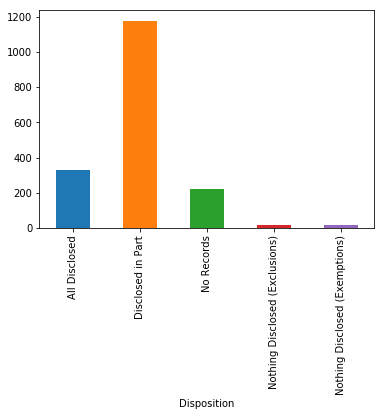

In [63]:
ax = ic.groupby('clean').clean.count().plot(kind='bar')
ax.set_xlabel('Disposition')



In [ ]:
#seems like 'disclosed in part' is by far the most common disposition, makes sense

In [71]:
ic.shape

(1759, 11)

In [73]:
#can we predict the disposition?
#modifying https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [74]:
from io import StringIO

In [75]:
col = ['clean', 'summary_en']
df = ic[col]

In [80]:
df=df[pd.notnull(df['summary_en'])]
df['category_id'] = df['clean'].factorize()[0]
category_id_df = df[['clean', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'clean']].values)

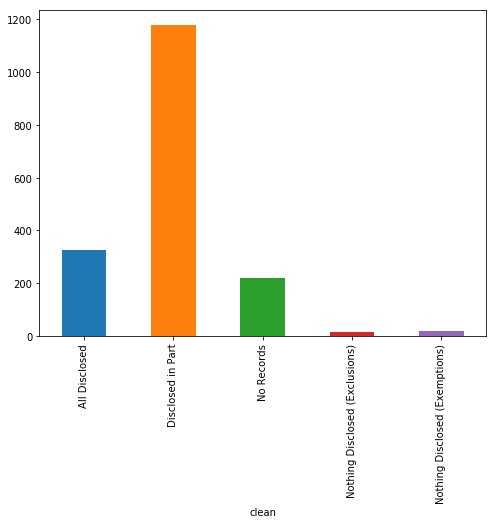

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('clean').summary_en.count().plot.bar(ylim=0)
plt.show()

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.summary_en).toarray()
labels = df.category_id
features.shape

(1758, 817)

In [92]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'All Disclosed':
  . Most correlated unigrams:
. regions
. patent
  . Most correlated bigrams:
. canada economic
. funding canada
# 'Disclosed in Part':
  . Most correlated unigrams:
. number
. lobbying
  . Most correlated bigrams:
. communications number
. lobbying communications
# 'No Records':
  . Most correlated unigrams:
. parvinder
. lobbying
  . Most correlated bigrams:
. communications number
. lobbying communications
# 'Nothing Disclosed (Exclusions)':
  . Most correlated unigrams:
. personal
. protection
  . Most correlated bigrams:
. 13 2018
. foreign investment
# 'Nothing Disclosed (Exemptions)':
  . Most correlated unigrams:
. produced
. internal
  . Most correlated bigrams:
. 2018 march
. july 2017


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['summary_en'], df['clean'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [105]:
print(clf.predict(count_vect.transform(["Information concerning Systemscope Inc."])))

['Disclosed in Part']


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/skl

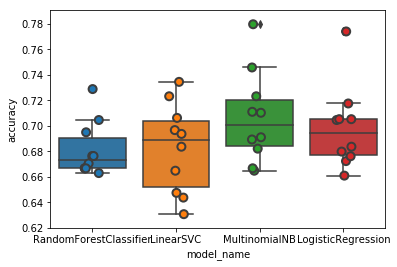

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [124]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.682426
LogisticRegression        0.697924
MultinomialNB             0.706359
RandomForestClassifier    0.681425
Name: accuracy, dtype: float64

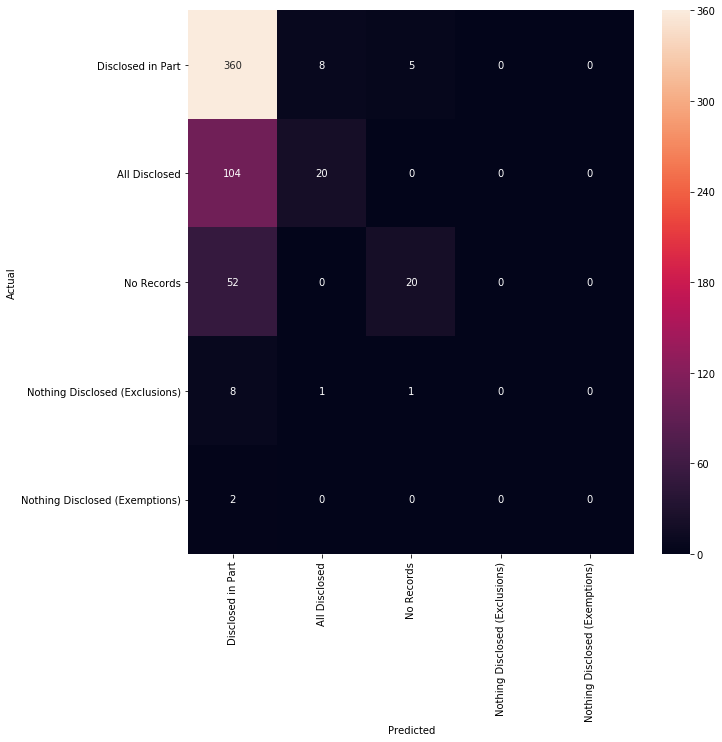

In [125]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.clean.values, yticklabels=category_id_df.clean.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [126]:
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['clean', 'summary_en']])
            print('')

'All Disclosed' predicted as 'Disclosed in Part' : 104 examples.


,clean,summary_en
16282,All Disclosed,CCM # 0296956: Meeting with MobilityView
16820,All Disclosed,CCM #305113: Deputy Minister Knubley’s and Sen...
17154,All Disclosed,Briefing notes concerning the Millimeter Wave ...
17156,All Disclosed,CCM #308956: Deputy Minister Knubley's meeting...
16332,All Disclosed,CCM # 0305250: Installation of the Governor Ge...
16985,All Disclosed,CCM #0301743: Canada’s participation at the Wo...
16351,All Disclosed,CCM # 0293611: Meeting with Halifax Partnership
17889,All Disclosed,Candidates taken on casual in the National Cap...
17930,All Disclosed,CCM No. 311687: Request for re-examination of ...
17601,All Disclosed,CCM # BN0000300: Update On Cannabis Legalizati...



'No Records' predicted as 'Disclosed in Part' : 52 examples.


,clean,summary_en
17713,No Records,Report by National Sports Organization Soccer ...
17174,No Records,Greyhound Canada's decision to suspend its bus...
16643,No Records,"All deliverables received as of January 8, 201..."
17715,No Records,Bell smart kiosks in St. Catherines and Kingst...
17662,No Records,"Since November 2015, number of people who work..."
16425,No Records,Attendance of members of Competition Bureau Me...
17024,No Records,Communications between the Canadian Intellectu...
17234,No Records,Application for change of name for Vancouver B...
17890,No Records,Briefing Notes regarding the Accounting and Au...
17846,No Records,Correspondence regarding the development or co...


In [114]:
model.fit(features, labels)
N = 2
for clean, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(clean))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'All Disclosed':
  . Top unigrams:
       . ccm
       . canada
  . Top bigrams:
       . economic development
       . intellectual property
# 'Disclosed in Part':
  . Top unigrams:
       . ccm
       . meeting
  . Top bigrams:
       . deputy minister
       . minister bains
# 'No Records':
  . Top unigrams:
       . communications
       . 2019
  . Top bigrams:
       . lobbying communications
       . communications number
# 'Nothing Disclosed (Exclusions)':
  . Top unigrams:
       . protection
       . act
  . Top bigrams:
       . foreign investment
       . minister meeting
# 'Nothing Disclosed (Exemptions)':
  . Top unigrams:
       . trade
       . report
  . Top bigrams:
       . strategic innovation
       . innovation fund


In [127]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['clean'].unique()))

                                precision    recall  f1-score   support

             Disclosed in Part       0.68      0.97      0.80       373
                 All Disclosed       0.69      0.16      0.26       124
                    No Records       0.77      0.28      0.41        72
Nothing Disclosed (Exclusions)       0.00      0.00      0.00        10
Nothing Disclosed (Exemptions)       0.00      0.00      0.00         2

                     micro avg       0.69      0.69      0.69       581
                     macro avg       0.43      0.28      0.29       581
                  weighted avg       0.68      0.69      0.62       581



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


17592    1
16881    0
16625    1
16771    0
17576    0
17533    0
17721    3
17223    0
17895    0
17970    2
16353    0
16464    0
17850    2
16364    0
16453    0
16680    0
16970    0
17066    2
16373    1
16336    0
17349    0
16879    0
16218    1
17408    0
17094    1
17471    2
17780    1
16394    2
16555    0
16292    0
        ..
17391    1
16543    0
17961    1
16268    0
17187    0
16624    0
16648    4
17762    0
17267    0
17174    2
17342    0
17906    0
16241    0
16247    0
17452    1
16635    0
17842    0
17803    2
17693    0
17827    0
17301    2
17494    2
16737    1
17676    0
17287    2
17490    0
17204    4
17617    0
17681    0
16800    0
Name: category_id, Length: 581, dtype: int64